In [35]:
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib as mol
mol.rcParams['axes.unicode_minus'] = False

<h2 style="background:rgba(121, 121, 211, 0.3); padding:10px;">논리게이트 (Logic gate) 클래스 구현</h2>

In [1]:
import numpy as np

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [2]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2 * delta_x)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [3]:
class LogicGate:
    def __init__(self, gate_name, xdata, tdata):
        self.name = gate_name
        self.xdata = xdata.reshape(4, 2)
        self.tdata = tdata.reshape(4, 1)
        self.W = np.random.rand(self.xdata.shape[1], 1)
        self.b = np.random.rand(1)
        self.learning_rate = 1e-2
        
        # 입력, 정답, 가중치 W, 바이어스 b, 학습률 learning rate 초기화
        
    def loss_func(self):
        delta = 1e-7   # 무한대 발산 방지
        z = np.dot(self.xdata, self.W) + self.b
        y = sigmoid(z)
        return -np.sum(self.tdata * np.log(y + delta) + (1-self.tdata) * np.log((1 - y) + delta))
    
    # 경사하강법을 이용하여 W, b 업데이트
    def train(self):
        f = lambda x: self.loss_func()   # x는 의미없고, loss_func()를 호출하기 위해 사용
        print("Initial loss value =", self.loss_func())
        
        for step in range(0, 8001):
            self.W -= self.learning_rate * numerical_derivative(f, self.W)
            self.b -= self.learning_rate * numerical_derivative(f, self.b)
            
            if (step % 1000 == 0):
                print("step =", step, "| loss value =", self.loss_func())
                
    # 미래값 예측
    def predict(self, input_data):
        z = np.dot(input_data, self.W) + self.b
        y = sigmoid(z)
        
        if y > 0.5:
            result = 1
        else:
            result = 0
            
        return y, result
    
    # 정확도 예측 함수
    def accuracy(self, test_xdata, test_tdata):
        matched_list = []
        not_matched_list = []
        
        for index in range(len(xdata)):
            (real_val, logical_val) = self.predict(test_xdata[index])
            if logical_val == test_tdata[index]:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
        accuracy_val = len(matched_list) / len(test_xdata)
        
        return accuracy_val

### AND 논리 게이트 검증

In [4]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 0, 0, 1])
AND_obj = LogicGate("AND_GATE", xdata, tdata)
AND_obj.train()

Initial loss value = 4.514498600780755
step = 0 | loss value = 4.460833242728881
step = 1000 | loss value = 1.0396236182794132
step = 2000 | loss value = 0.6736392144710615
step = 3000 | loss value = 0.498857762067107
step = 4000 | loss value = 0.395022307515283
step = 5000 | loss value = 0.3261929801139968
step = 6000 | loss value = 0.2773082236253355
step = 7000 | loss value = 0.2408643020920387
step = 8000 | loss value = 0.21269227760391188


In [5]:
test_xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for input_data in test_xdata:
    (sigmoid_val, logical_val) = AND_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[0 0]  =  0
[0 1]  =  0
[1 0]  =  0
[1 1]  =  1


In [6]:
test_tdata = np.array([0, 0, 0, 1])
accuracy_ret = AND_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


### OR 논리 게이트 검증

In [7]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 1, 1, 1])
OR_obj = LogicGate("OR_GATE", xdata, tdata)
OR_obj.train()

Initial loss value = 1.7654300363996847
step = 0 | loss value = 1.7630013368475983
step = 1000 | loss value = 0.7088639163646903
step = 2000 | loss value = 0.4272611290028373
step = 3000 | loss value = 0.3013962792678098
step = 4000 | loss value = 0.2312153680262412
step = 5000 | loss value = 0.18686103152657663
step = 6000 | loss value = 0.1564510156626914
step = 7000 | loss value = 0.1343735350590414
step = 8000 | loss value = 0.11765149387903177


In [8]:
test_xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for input_data in test_xdata:
    (sigmoid_val, logical_val) = OR_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[0 0]  =  0
[0 1]  =  1
[1 0]  =  1
[1 1]  =  1


In [9]:
test_tdata = np.array([0, 1, 1, 1])
accuracy_ret = OR_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


### NAND 논리 게이트 검증

In [10]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([1, 1, 1, 0])
NAND_obj = LogicGate("NAND_GATE", xdata, tdata)
NAND_obj.train()

Initial loss value = 2.7320311251294958
step = 0 | loss value = 2.7241813553867367
step = 1000 | loss value = 1.0317923826954625
step = 2000 | loss value = 0.6705565275148125
step = 3000 | loss value = 0.49715327129172465
step = 4000 | loss value = 0.39393779852394095
step = 5000 | loss value = 0.32544369524788735
step = 6000 | loss value = 0.27676077947359895
step = 7000 | loss value = 0.2404476144003721
step = 8000 | loss value = 0.21236498753921484


In [11]:
test_xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for input_data in test_xdata:
    (sigmoid_val, logical_val) = NAND_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[0 0]  =  1
[0 1]  =  1
[1 0]  =  1
[1 1]  =  0


In [12]:
test_tdata = np.array([1, 1, 1, 0])
accuracy_ret = NAND_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


### XOR 논리 게이트 검증

In [13]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 1, 1, 0])
XOR_obj = LogicGate("XOR_GATE", xdata, tdata)
XOR_obj.train()

Initial loss value = 3.599273381596358
step = 0 | loss value = 3.579597254593824
step = 1000 | loss value = 2.7732420277592467
step = 2000 | loss value = 2.7726144178059196
step = 3000 | loss value = 2.7725890453819773
step = 4000 | loss value = 2.7725879702040364
step = 5000 | loss value = 2.772587924290585
step = 6000 | loss value = 2.7725879223275562
step = 7000 | loss value = 2.772587922243612
step = 8000 | loss value = 2.7725879222400223


In [14]:
test_xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for input_data in test_xdata:
    (sigmoid_val, logical_val) = XOR_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[0 0]  =  0
[0 1]  =  0
[1 0]  =  0
[1 1]  =  1


In [15]:
test_tdata = np.array([0, 1, 1, 0])
accuracy_ret = XOR_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 0.25


### => XOR 논리게이트 해결방법

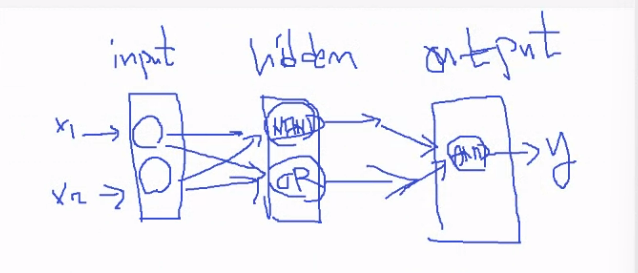

In [16]:
test_xdata = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

NAND_data = []
OR_data = []

for input_data in test_xdata:
    (sigmoid_val, logical_val1) = NAND_obj.predict(input_data)
    (sigmoid_val, logical_val2) = OR_obj.predict(input_data)
    NAND_data.append(logical_val1)
    OR_data.append(logical_val2)
    
    print(input_data, " = ", logical_val1)
    print(input_data, " = ", logical_val2)

[0 0]  =  1
[0 0]  =  0
[1 0]  =  1
[1 0]  =  1
[0 1]  =  1
[0 1]  =  1
[1 1]  =  0
[1 1]  =  1


In [17]:
NAND_data

[1, 1, 1, 0]

In [18]:
OR_data

[0, 1, 1, 1]

In [19]:
NAND_data[0]

1

In [20]:
xdata = np.array([[NAND_data[0], OR_data[0]], [NAND_data[1], OR_data[1]], [NAND_data[2], OR_data[2]], [NAND_data[3], OR_data[3]]])
print(xdata)
tdata = np.array([0, 1, 1, 0])

XOR_obj = LogicGate("AND_GATE", xdata, tdata)
XOR_obj.train()

[[1 0]
 [1 1]
 [1 1]
 [0 1]]
Initial loss value = 3.2479599332776528
step = 0 | loss value = 3.2255539131346493
step = 1000 | loss value = 1.3041893773132756
step = 2000 | loss value = 0.8183421896533795
step = 3000 | loss value = 0.5823979373417585
step = 4000 | loss value = 0.4475027516451975
step = 5000 | loss value = 0.36148731276484775
step = 6000 | loss value = 0.30232759775223755
step = 7000 | loss value = 0.2593436234541637
step = 8000 | loss value = 0.22679425037950968


In [21]:
test_xdata = xdata

for input_data in test_xdata:
    (sigmoid_val, logical_val) = AND_obj.predict(input_data)
    print(input_data, " = ", logical_val)

[1 0]  =  0
[1 1]  =  1
[1 1]  =  1
[0 1]  =  0


In [22]:
test_tdata = np.array([0, 1, 1, 0])
accuracy_ret = XOR_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


---

In [23]:
# XOR 학습코드
# NAND_obj, OR_obj, AND_obj 객체는 이미 생성된 것으로 가정.
input_data=np.array([[0,0],[0,1],[1,0],[1,1]])

s1=[]  # NAND 출력
s2=[]  # OR 출력
new_input_data=[] # AND 입력
final_output=[] # AND 출력
test_xdata = [] # 정확치 계산

for index in range(len(input_data)):
    s1=NAND_obj.predict(input_data[index])  # NAND 출력
    s2=OR_obj.predict(input_data[index])  # OR 출력
  
    new_input_data.append(s1[-1])  # AND 입력
    new_input_data.append(s2[-1])  # OR 입력
    test_xdata.append([s1[-1], s2[-1]])
  
    (sigmoid_val, logical_val)=AND_obj.predict(np.array(new_input_data)) #s1, s2 입력
  
    final_output.append(logical_val)  # AND 출력, 즉 XOR 출력
    new_input_data=[]  # AND 입력 초기화
    
for index in range(len(input_data)):
    print(input_data[index], "=",final_output[index])
    
print(test_xdata)

[0 0] = 0
[0 1] = 1
[1 0] = 1
[1 1] = 0
[[1, 0], [1, 1], [1, 1], [0, 1]]


In [24]:
test_tdata = np.array([0, 1, 1, 0])

accuracy_ret = XOR_obj.accuracy(test_xdata, test_tdata)
print("Accuracy =>", accuracy_ret)

Accuracy => 1.0


---
### ANSWER

In [25]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 0, 0, 1])
AND_obj = LogicGate("AND_GATE", xdata, tdata)
AND_obj.train()
print("====================================================")

xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 1, 1, 1])
OR_obj = LogicGate("OR_GATE", xdata, tdata)
OR_obj.train()
print("====================================================")

xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([1, 1, 1, 0])
NAND_obj = LogicGate("NAND_GATE", xdata, tdata)
NAND_obj.train()

Initial loss value = 4.221394516140636
step = 0 | loss value = 4.177845952676128
step = 1000 | loss value = 1.074261706043731
step = 2000 | loss value = 0.6876577526194291
step = 3000 | loss value = 0.5065828981072256
step = 4000 | loss value = 0.3999211844752121
step = 5000 | loss value = 0.3295696853716775
step = 6000 | loss value = 0.2797711460602778
step = 7000 | loss value = 0.24273656152570686
step = 8000 | loss value = 0.21416138378909205
Initial loss value = 1.8627907331422535
step = 0 | loss value = 1.8602363804187112
step = 1000 | loss value = 0.7309776736064002
step = 2000 | loss value = 0.4360371292575869
step = 3000 | loss value = 0.3059458803960258
step = 4000 | loss value = 0.23395547595986432
step = 5000 | loss value = 0.18867723901863004
step = 6000 | loss value = 0.1577371784555959
step = 7000 | loss value = 0.13532937592067262
step = 8000 | loss value = 0.11838838184938034
Initial loss value = 2.849915076871288
step = 0 | loss value = 2.844948899011043
step = 1000 | 

In [30]:
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
s1 = []
s2 = []
new_input_data = []
final_output = []

for index in range(len(input_data)):
    s1 = NAND_obj.predict(input_data[index])
    s2 = OR_obj.predict(input_data[index])
    print("s1", s1)
    print("s2", s2)
    
    new_input_data.append(s1[-1])
    new_input_data.append(s2[-1])
    
    (sigmoid_val, logical_val) = AND_obj.predict(np.array(new_input_data))   # 확률값, 예측결과값
    final_output.append(logical_val)
    new_input_data = []
    
for index in range(len(input_data)):
    print(input_data[index], "=", final_output[index])
    

s1 (array([0.99961558]), 1)
s2 (array([0.06433674]), 0)
s1 (array([0.93951967]), 1)
s2 (array([0.97436709]), 1)
s1 (array([0.93952384]), 1)
s2 (array([0.97445729]), 1)
s1 (array([0.0849275]), 0)
s2 (array([0.99995259]), 1)
[0 0] = 0
[0 1] = 1
[1 0] = 1
[1 1] = 0


In [27]:
s1

(array([0.0849275]), 0)

In [28]:
print(s1)

(array([0.0849275]), 0)


In [29]:
s2

(array([0.99995259]), 1)

<span style="width:100%; height:3px; background:#ff6600; display:block;"></span>

<h2 style="background:rgba(121, 121, 211, 0.3); padding:10px;">다층 퍼셉트론 (MLP)</h2>

In [54]:
import numpy as np

In [55]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

# 0과 1 사이의 확률값을 리턴

In [56]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

In [57]:
class LogicGate:
    def __init__(self, gate_name, xdata, tdata):
        self.name = gate_name
        self.xdata = xdata.reshape(4,2)
        self.tdata = tdata.reshape(4,1)
        
        # 2,6 => 입력층 2개, 은닉층 6개
        self.W2 = np.random.rand(2,6)
        self.b2 = np.random.rand(6)
        
        # 6,1 => 은닉층 6개, 출력층 1개
        self.W3 = np.random.rand(6,1)
        self.b3 = np.random.rand(1)
        
        # 학습률 learning rate 초기화
        self.learning_rate = 1e-2
        
    def feed_forward(self):
        delta = 1e-7
        z2 = np.dot(self.xdata, self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        return -np.sum(self.tdata * np.log(y + delta) + (1 - self.tdata) * np.log((1 - y) + delta))
    
    # 단순한 작업 처리를 위한 함수
    # dot(): 행렬의 곱
    
    def loss_val(self):
        delta = 1e-7
        z2 = np.dot(self.xdata, self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        return -np.sum(self.tdata * np.log(y + delta) + (1 - self.tdata) * np.log((1 - y) + delta))
    
    # 손실값을 구하기 위한 함수
    # feed_forward()와 내용은 같으나 용도가 다름
    # 주로 사용하는 활성함수는 relu(z)
    
    def train(self):
        f = lambda x: self.feed_forward()
        print("Initial loss value =", self.loss_val())
        
        for step in range(20001):
            self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
            self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
            self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)            
            self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)
            
            if (step % 1000 == 0):
                print("setp =", step, "| loss value =", self.loss_val())
                
    def predict(self, input_data):
        self.xdata = input_data
        z2 = np.dot(self.xdata, self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        if y > 0.5:
            result = 1
        else:
            result = 0
            
        return y, result

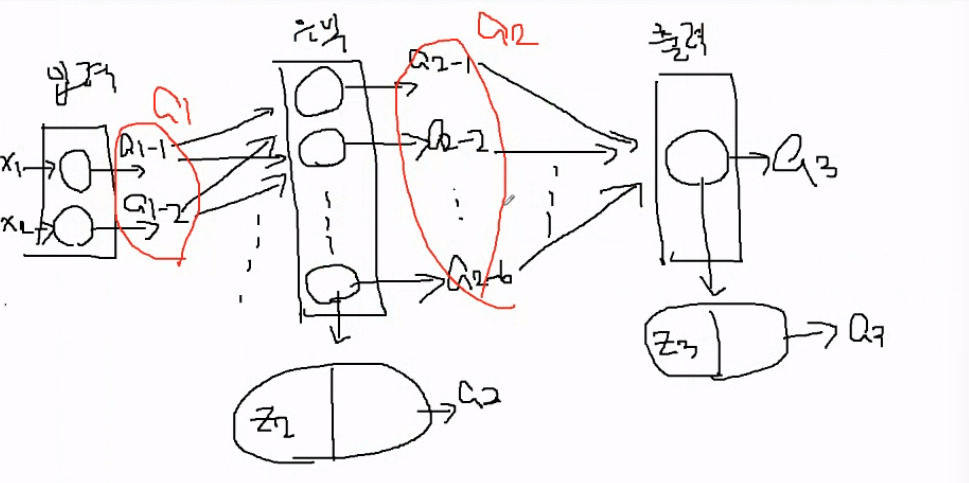

In [58]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 1, 1, 0])
xor_obj = LogicGate("XOR", xdata, tdata)
xor_obj.train()

Initial loss value = 4.783733674204727
setp = 0 | loss value = 4.672871852232539
setp = 1000 | loss value = 2.7532349911083904
setp = 2000 | loss value = 2.7229148598154165
setp = 3000 | loss value = 2.653483657114094
setp = 4000 | loss value = 2.5084757468903676
setp = 5000 | loss value = 2.2817297674093906
setp = 6000 | loss value = 2.047262166787966
setp = 7000 | loss value = 1.8449683119484712
setp = 8000 | loss value = 1.6321824094275883
setp = 9000 | loss value = 1.2955391020452038
setp = 10000 | loss value = 0.9093688568825828
setp = 11000 | loss value = 0.6330018548350751
setp = 12000 | loss value = 0.4558272191383317
setp = 13000 | loss value = 0.341030382518348
setp = 14000 | loss value = 0.2644126466855089
setp = 15000 | loss value = 0.21146335541458458
setp = 16000 | loss value = 0.17358549648129315
setp = 17000 | loss value = 0.1456196172771651
setp = 18000 | loss value = 0.12438840025726705
setp = 19000 | loss value = 0.10787467387817323
setp = 20000 | loss value = 0.0947

In [59]:
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
    sigmoid_val, logical_val = xor_obj.predict(data)
    print(data, "=", logical_val)

[0 0] = 0
[0 1] = 1
[1 0] = 1
[1 1] = 0


##### 은닉층 추가 예제

In [60]:
class LogicGate:
    def __init__(self, gate_name, xdata, tdata):
        self.name = gate_name
        self.xdata = xdata.reshape(4,2)
        self.tdata = tdata.reshape(4,1)
        
        # 2,6 => 입력층 2개, 은닉층 6개
        self.W2 = np.random.rand(2,6)
        self.b2 = np.random.rand(6)
        
        # 6,4 => 은닉층 6개, 은닉층 4개
        self.W3 = np.random.rand(6,4)
        self.b3 = np.random.rand(4)
        
        # 4,1 => 은닉층 4개, 출력층 1개
        self.W4 = np.random.rand(4,1)
        self.b4 = np.random.rand(1)
        
        # 학습률 learning rate 초기화
        self.learning_rate = 1e-2
        
    def feed_forward(self):
        delta = 1e-7
        z2 = np.dot(self.xdata, self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        a3 = sigmoid(z3)
        z4 = np.dot(a3, self.W4) + self.b4
        y = a4 = sigmoid(z4)
        return -np.sum(self.tdata * np.log(y + delta) + (1 - self.tdata) * np.log((1 - y) + delta))
    
    # 단순한 작업 처리를 위한 함수
    # dot(): 행렬의 곱
    
    def loss_val(self):
        delta = 1e-7
        z2 = np.dot(self.xdata, self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        a3 = sigmoid(z3)
        z4 = np.dot(a3, self.W4) + self.b4
        y = a4 = sigmoid(z4)
        return -np.sum(self.tdata * np.log(y + delta) + (1 - self.tdata) * np.log((1 - y) + delta))
    
    # 손실값을 구하기 위한 함수
    # feed_forward()와 내용은 같으나 용도가 다름
    # 주로 사용하는 활성함수는 relu(z)
    
    def train(self):
        f = lambda x: self.feed_forward()
        print("Initial loss value =", self.loss_val())
        
        for step in range(40001):
            self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
            self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
            self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)            
            self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)
            self.W4 -= self.learning_rate * numerical_derivative(f, self.W4)            
            self.b4 -= self.learning_rate * numerical_derivative(f, self.b4)
            
            if (step % 4000 == 0):
                print("setp =", step, "| loss value =", self.loss_val())
                
    def predict(self, input_data):
        self.xdata = input_data
        z2 = np.dot(self.xdata, self.W2) + self.b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.W3) + self.b3
        a3 = sigmoid(z3)
        z4 = np.dot(a3, self.W4) + self.b4
        y = a4 = sigmoid(z4)
        
        if y > 0.5:
            result = 1
        else:
            result = 0
            
        return y, result

In [61]:
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tdata = np.array([0, 1, 1, 0])
xor_obj = LogicGate("XOR", xdata, tdata)
xor_obj.train()

Initial loss value = 6.365290556324556
setp = 0 | loss value = 6.213263978628781
setp = 4000 | loss value = 2.7724450258870084
setp = 8000 | loss value = 2.771634832735658
setp = 12000 | loss value = 2.770591964439344
setp = 16000 | loss value = 2.768922163445283
setp = 20000 | loss value = 2.7654775166257397
setp = 24000 | loss value = 2.754820591874699
setp = 28000 | loss value = 2.6739946727086927
setp = 32000 | loss value = 2.0961933020901604
setp = 36000 | loss value = 0.2849843513605916
setp = 40000 | loss value = 0.07951332844343338


In [62]:
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
    sigmoid_val, logical_val = xor_obj.predict(data)
    print(data, "=", logical_val)
    

[0 0] = 0
[0 1] = 1
[1 0] = 1
[1 1] = 0


### 계단 함수 (Step function)

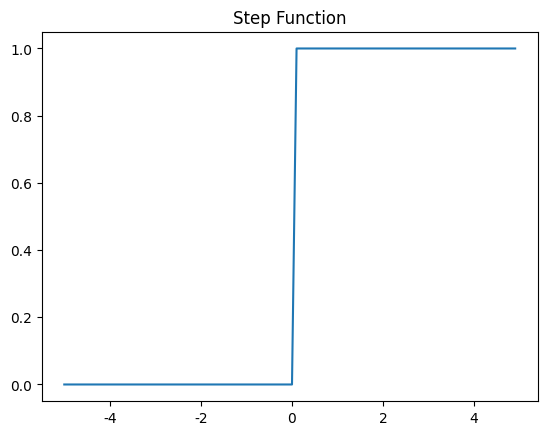

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)

plt.title('Step Function')
plt.plot(x,y)
plt.show()    

### 시그모이드 함수 (Sigmoid function)

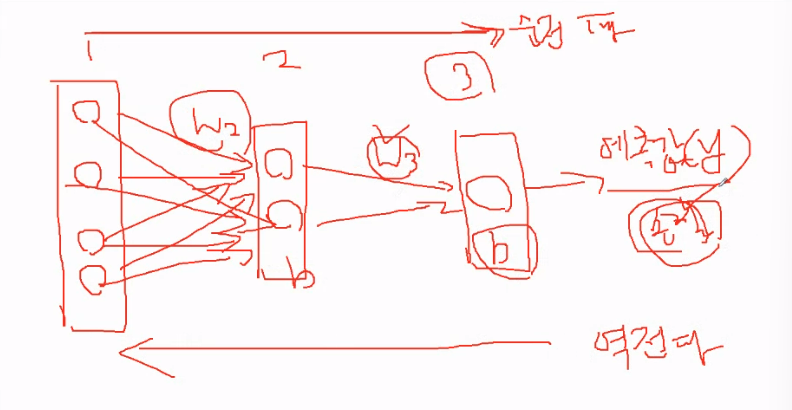
=> 손실값을 통해 W3와 b를 구하는 방법

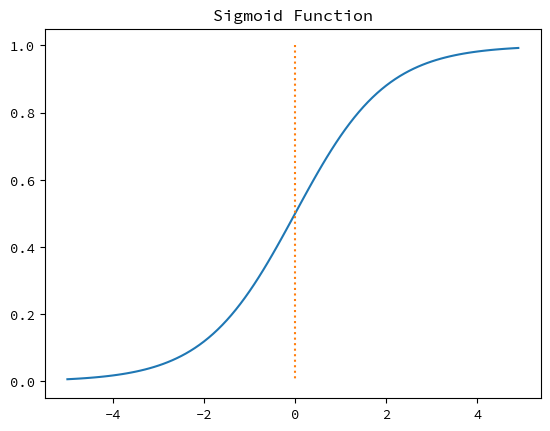

In [64]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

# plt.rcParams['font.family'] = 'LG SMART UI'
plt.rcParams['font.family'] = 'Source Code Pro'

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### 하이퍼볼릭탄젠트 함수 (Hyperbolic tangent function)

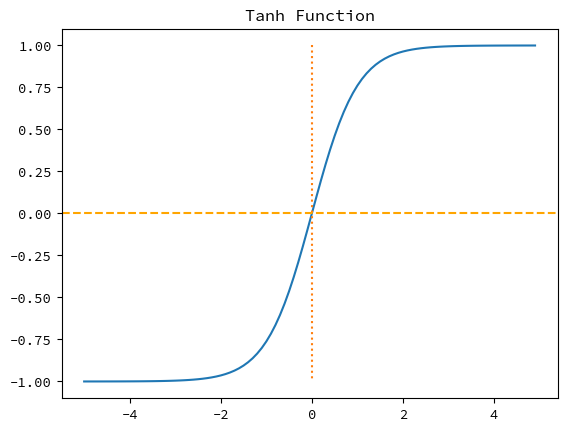

In [65]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)
plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

### 렐루 함수 (ReLU)

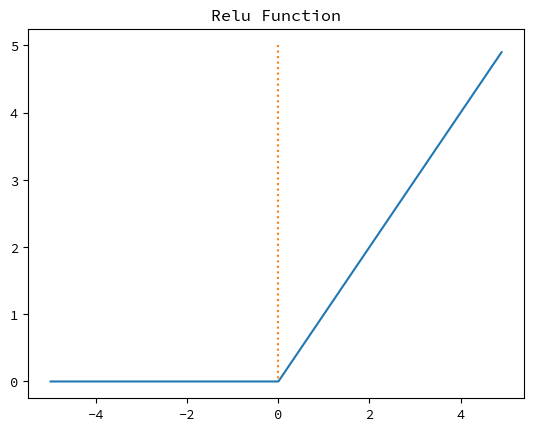

In [66]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

### 리키 렐루 (Leaky ReLU)

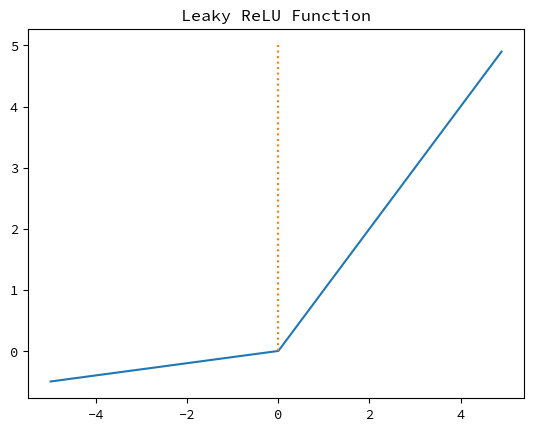

In [67]:
a = 0.1
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)
plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

### 소프트맥스 함수 (Softmax function)

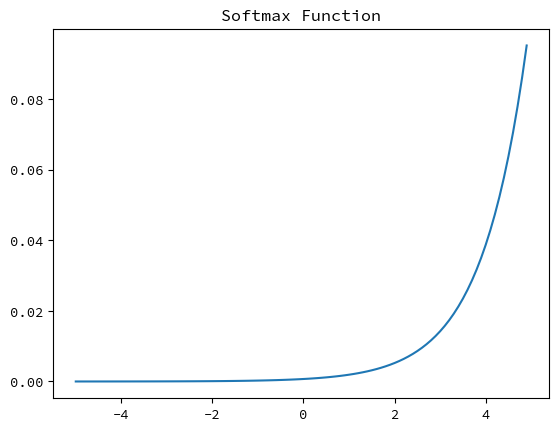

In [68]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))
plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

<span style="width:100%; height:3px; background:#ff6600; display:block;"></span>

<h2 style="background:rgba(121, 121, 211, 0.3); padding:10px;">Keras로 다양한 딥러닝 해보기 (DNN)</h2>

### Ex01) Keras로 Mnist 테스트

- Mnist: 손글씨 데이터

In [37]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt

#### 1. MNIST 데이터 읽어 들이기

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# (학습데이터, 학습데이터 정답), (훈련데이터, 훈련데이터 정답)

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
X_test.shape

(10000, 28, 28)

In [41]:
y_train.shape

(60000,)

In [42]:
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

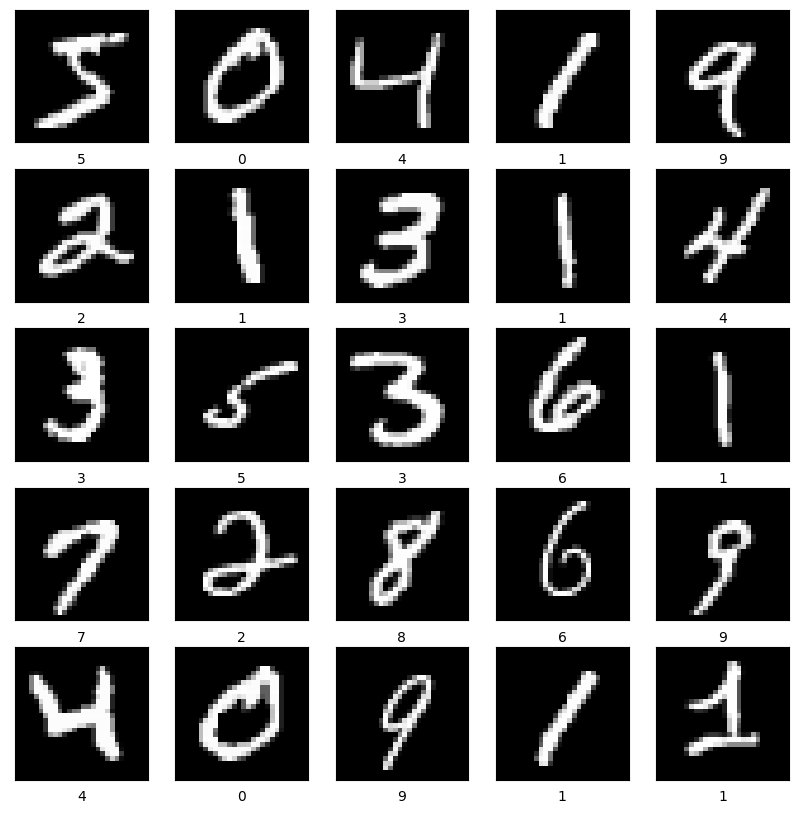

In [44]:
plt.figure(figsize=(10,10))

for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))
    
plt.show()

#### 2. 데이터를 float32 자료형으로 변환하고 정규화하기

In [45]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

X_train /= 255
X_test /= 255

#### 2-a. 레이블 데이터를 0-9까지의 카테고리를 나타내는 배열로 변환하기

In [46]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# to_categorical(): Keras가 제공하는 원핫인코딩

In [47]:
y_train.shape

(60000, 10)

In [48]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### 3. 모델 구조 정의하기

In [49]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))   # 784개 입력 node는 512개
model.add(Activation('relu'))   # 활성함수 relu사용
model.add(Dropout(0.2))   # 20%를 dropout

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 출력층 => mnist는 0~9까지 10개이므로 무조건 출력은 10개! 그리고 다중분류이므로 softmax를 사용해야함
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 activation_14 (Activation)  (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 activation_15 (Activation)  (None, 512)               0         
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 10)               

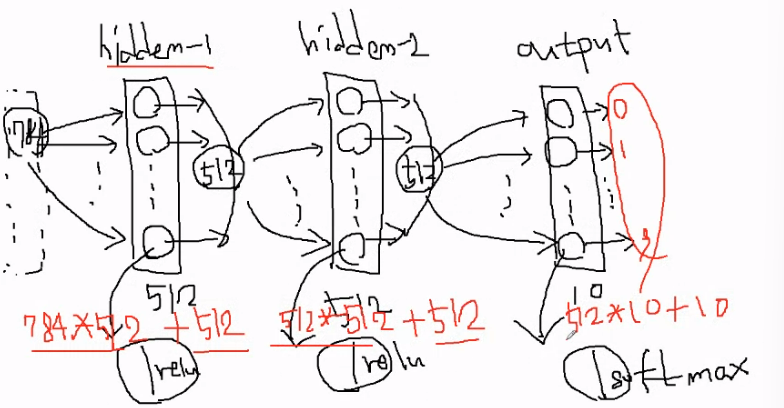

##### cf) Flatten 사용

In [69]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt

#### 1. MNIST 데이터 읽어 들이기

In [70]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# (학습데이터, 학습데이터 정답), (훈련데이터, 훈련데이터 정답)

In [71]:
X_train.shape

(60000, 28, 28)

In [72]:
X_test.shape

(10000, 28, 28)

In [73]:
y_train.shape

(60000,)

In [74]:
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [75]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

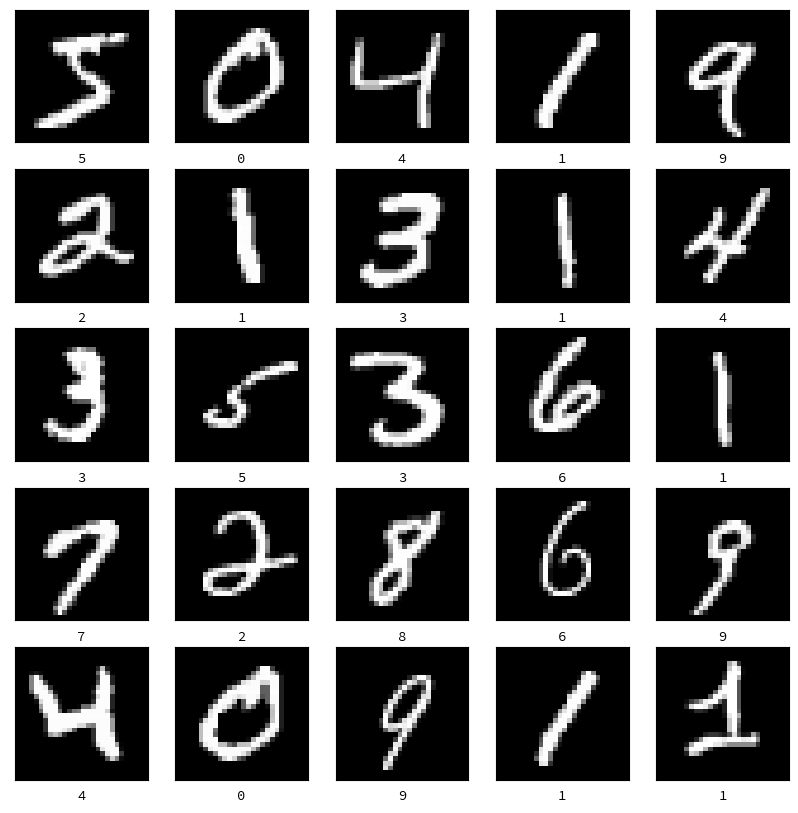

In [76]:
plt.figure(figsize=(10,10))

for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))
    
plt.show()

#### 2. 데이터를 float32 자료형으로 변환하고 정규화하기

In [77]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### 2-a. 레이블 데이터를 0-9까지의 카테고리를 나타내는 배열로 변환하기

In [78]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# to_categorical(): Keras가 제공하는 원핫인코딩

In [79]:
y_train.shape

(60000, 10)

In [80]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [81]:
from tensorflow.keras.layers import Flatten

model = Sequential()

# model.add(Flatten(input_shape=(1,)))
model.add(Flatten(input_shape=(28, 28)))   # flatten을 거치면 2차원구조가 1차원구조로 변경되어서 사용

model.add(Dense(512))   # 784개 입력 node는 512개
model.add(Activation('relu'))   # 활성함수 relu사용
model.add(Dropout(0.2))   # 20%를 dropout

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 출력층 => mnist는 0~9까지 10개이므로 무조건 출력은 10개! 그리고 다중분류이므로 softmax를 사용해야함
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 activation_17 (Activation)  (None, 512)               0         
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 activation_18 (Activation)  (None, 512)               0         
                                                                 
 dropout_12 (Dropout)        (None, 512)              

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 4. 데이터 훈련하기

In [51]:
hist = model.fit(X_train, y_train, epochs=5)

# 1epoch = 32*1825

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2135 - accuracy: 0.9340
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1056 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0805 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - lo

In [52]:
hist = model.fit(X_train, y_train, epochs=5, batch_size=32)

# batch_size: 한 번 학습하는데 사용되는 데이터의 크기 (default=32)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0508 - accuracy: 0.9844
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0467 - accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.9871
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0399 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0386 - accuracy: 0.9886


In [53]:
hist = model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0180 - accuracy: 0.9942
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0179 - accuracy: 0.9944
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0200 - accuracy: 0.9935
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0184 - accuracy: 0.9944


#### 5. 테스트 데이터로 평가하기

In [15]:
score = model.evaluate(X_test, y_test, verbose=1)
print("loss =", score[0])
print("accuracy =", score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 3ms/step - loss: 0.0730 - accuracy: 0.9788
loss = 0.07297476381063461
accuracy = 0.9787999987602234


---
### Ex02) Keras로 비만도 테스트

In [106]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np

#### 1. BMI 데이터를 읽어들이고 정규화하기

In [107]:
csv = pd.read_csv("../3_Machine Learning/datasets/bmi.csv")
csv.head()

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat


##### - 몸무게와 키 데이터

In [108]:
csv['weight'] /= 100
csv['height'] /= 200

X = csv[['weight', 'height']].to_numpy()
X

array([[0.62 , 0.71 ],
       [0.73 , 0.71 ],
       [0.61 , 0.885],
       ...,
       [0.37 , 0.965],
       [0.51 , 0.975],
       [0.67 , 0.815]])

##### - 레이블

In [109]:
bclass = {"thin": [1, 0, 0], "normal": [0, 1, 0], "fat": [0, 0, 1]}   # 딕셔너리 자료를 원-핫인코딩작업 형식으로 변경해줌
y = np.empty((20000, 3))

for i, v in enumerate(csv['label']):
    y[i] = bclass[v]

In [110]:
y[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

####  2. 훈련 전용 데이터와 테스트 전용 데이터로 나누기

In [111]:
X_train, y_train = X[1:15001], y[1: 15001]
X_test, y_test = X[15001:20001], y[15001:20001]

X_train.shape, X_test.shape

((15000, 2), (4999, 2))

#### 3. 모델 구조 정의하기

In [113]:
model = Sequential()

# 입력층
model.add(Flatten(input_shape=(2,)))

# 은닉층-1
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))   # 필수 사항은 아니며, 과적합방지 위해 사용

# 은닉층-2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# 출력층
model.add(Dense(3))   # 분류하고자 하는 결과값과 개수가 동일해야하므로 3개(thin/normal/fat)
model.add(Activation('softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2)                 0         
                                                                 
 dense_26 (Dense)            (None, 512)               1536      
                                                                 
 activation_20 (Activation)  (None, 512)               0         
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 512)               262656    
                                                                 
 activation_21 (Activation)  (None, 512)               0         
                                                                 
 dropout_17 (Dropout)        (None, 512)             

#### 4. 모델 구축하기

In [114]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 5. 데이터 훈련하기

In [115]:
hist = model.fit(X_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
150/150 [==============================] - 1s 5ms/step - loss: 0.4294 - accuracy: 0.8463
Epoch 2/20
150/150 [==============================] - 1s 5ms/step - loss: 0.1442 - accuracy: 0.9500
Epoch 3/20
150/150 [==============================] - 1s 5ms/step - loss: 0.1025 - accuracy: 0.9627
Epoch 4/20
150/150 [==============================] - 1s 5ms/step - loss: 0.08

#### 6. 그래프로 확인

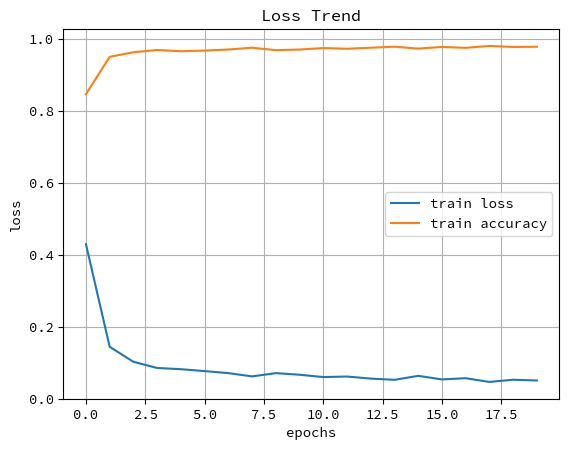

In [116]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(hist.history['loss'], label="train loss")
plt.plot(hist.history['accuracy'], label="train accuracy")
plt.legend(loc="best")

plt.show()

#### 7. 테스트 데이터로 평가하기

In [117]:
score = model.evaluate(X_test, y_test, verbose=1)
print("\nloss =", score[0])
print("accuracy =", score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
157/157 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9886

loss = 0.03495568409562111
accuracy = 0.9885976910591125


---

### Ex03) tf.keras로 실습하기 (mnist 데이터)

In [138]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

model = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28,28)),      # 입력층
    tf.keras.layers.Dense(128, activation="relu"),      # 은닉층
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")])   # 출력층
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5)

# loss 변수에 sparse_가 붙은 것이 기존 keras와 차이점

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4365 - accuracy: 0.7473
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6043 - accuracy: 0.8438
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4861 - accuracy: 0.8726
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 

##### - 케라스 모델의 정확도는 evaluate 메서드를 이용해 확인

In [140]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\n테스트 정확도:", test_acc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.3275 - accuracy: 0.9308 - 373ms/epoch - 1ms/step

테스트 정확도: 0.9308000206947327


In [142]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
predictions.shape

313/313 [==============================] - 0s 921us/step


(10000, 10)

In [143]:
predictions[0]

array([1.3643541e-36, 1.3406067e-28, 1.0132222e-12, 5.5968251e-13,
       5.8718326e-18, 2.7137278e-19, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.6485191e-16], dtype=float32)

예측값: 7, 실제값: 7


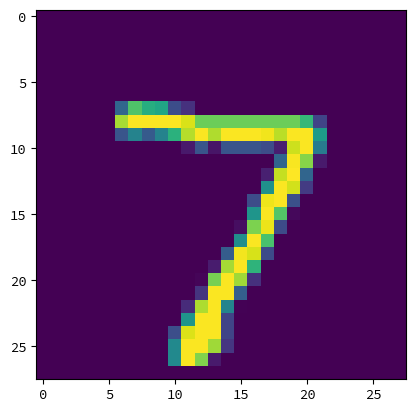

In [144]:
pred = np.argmax(predictions[0])

print("예측값: {}, 실제값: {}".format(pred, y_test[0]))
plt.imshow(x_test[0])
plt.show()

# argmax(): 값 중 가장 큰 값을 저장 시켜줌

##### - history 객체는 모델이 매 epochs마다 측정한 비용(loss)과 정확도를 기록

In [91]:
history.history

{'loss': [2.5519888401031494,
  0.5821768045425415,
  0.46795204281806946,
  0.41705089807510376,
  0.39410966634750366],
 'accuracy': [0.7574499845504761,
  0.8476666808128357,
  0.8761833310127258,
  0.890583336353302,
  0.8979499936103821]}

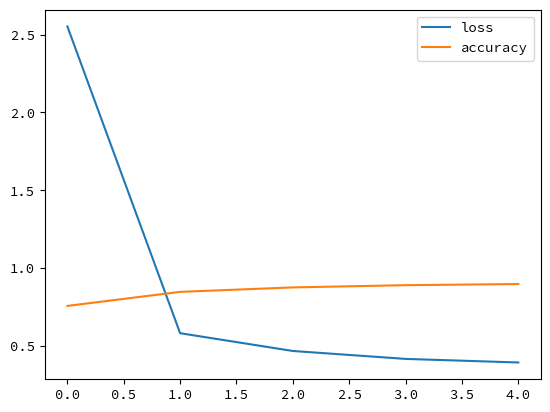

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.show()

---

### Ex04) tf.keras 기본 이미지 분류 예제

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullober', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##### - 데이터셋 구조 확인

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [22]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
train_labels[:100]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

##### - 데이터 전처리

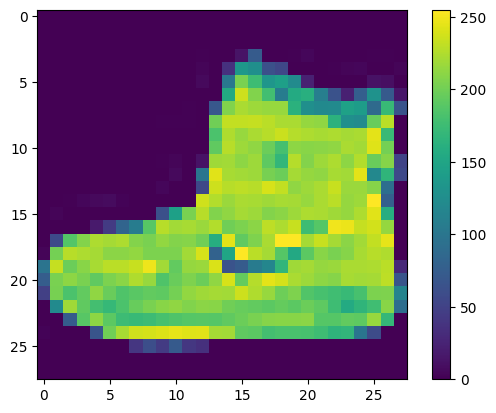

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

##### - 신경망 모델에 주입하기 전에 값의 범위 0~1사이로 조정

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##### - 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름 출력

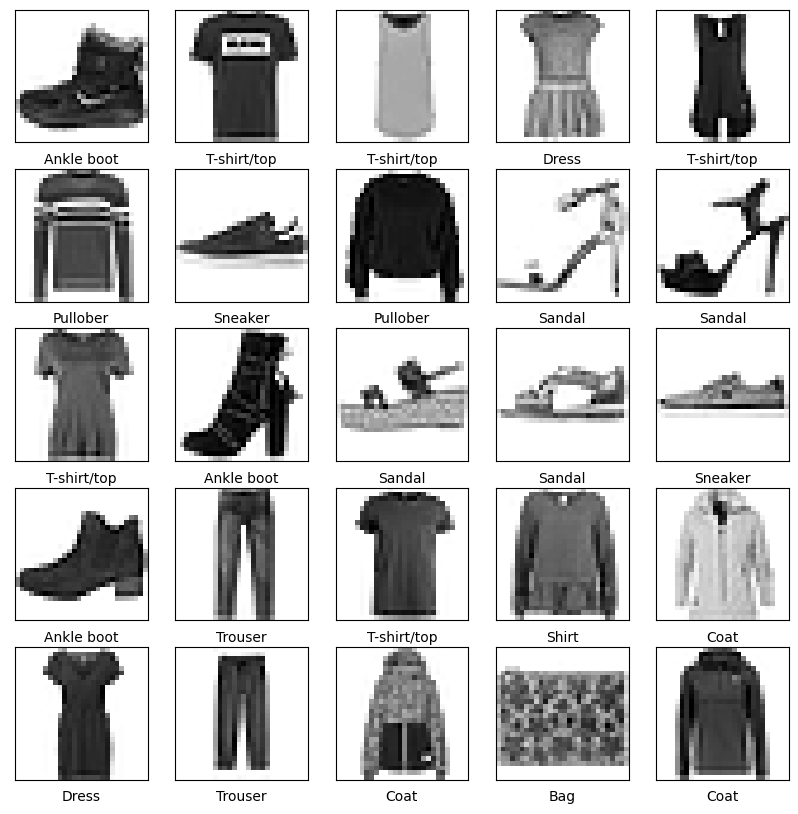

In [28]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

##### - 모델 구성

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),    # 입력층
    keras.layers.Dense(128, activation="relu"),    # 은닉층
    keras.layers.Dense(10, activation="softmax")   # 출력층
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

##### - 모델 훈련

In [30]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4931 - accuracy: 0.8274
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3740 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3350 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 

In [31]:
history.history

{'loss': [0.4931451678276062,
  0.3739596903324127,
  0.3350496292114258,
  0.30954694747924805,
  0.29321324825286865],
 'accuracy': [0.8273833394050598,
  0.8649666905403137,
  0.8783166408538818,
  0.8863166570663452,
  0.8914833068847656]}

##### - 손실과 정확도 그래프로 확인

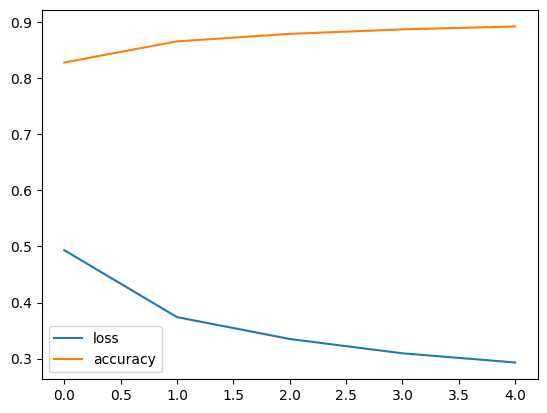

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.show()

##### - 정확도 평가

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\n테스트 정확도:", test_acc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.3581 - accuracy: 0.8683 - 406ms/epoch - 1ms/step

테스트 정확도: 0.8683000206947327


##### - 예측 만들기

In [34]:
predictions = model.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 937us/step


In [35]:
predictions.shape

(10000, 10)

##### - 첫 번째 예측 확인
=> 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냄

In [36]:
predictions[0]

array([1.0624842e-06, 1.9368031e-07, 1.2458833e-06, 1.6427507e-06,
       4.1143133e-07, 7.6999296e-03, 1.6568363e-05, 3.8228359e-02,
       1.3973266e-05, 9.5403659e-01], dtype=float32)

##### - 가장 높은 신뢰도를 가진 레이블

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

##### - 10개 클래스에 대한 예측을 모두 그래프로 표현

In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100 * np.max(predictions_array), class_names[true_label]), color=color, fontsize=12)
    

In [40]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

#####  - 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

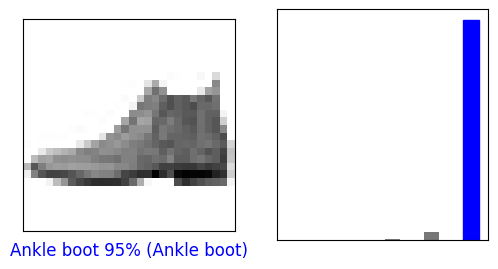

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

##### - 12번째 원소의 이미지, 예측, 신뢰도, 점수 배열 확인
=> 올바르게 예측된 레이블은 파란색, 잘못 예측된 레이블은 빨간색

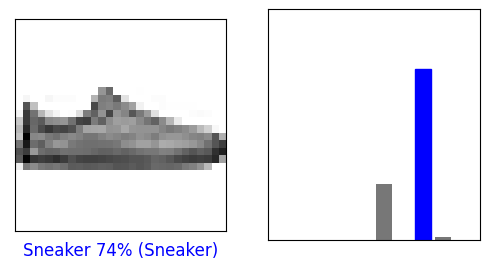

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

##### - 처음 X개의 테스트 이미지와 예측 레이블, 진짜 레이블 출력
=> O: 파란색 / X: 빨간색

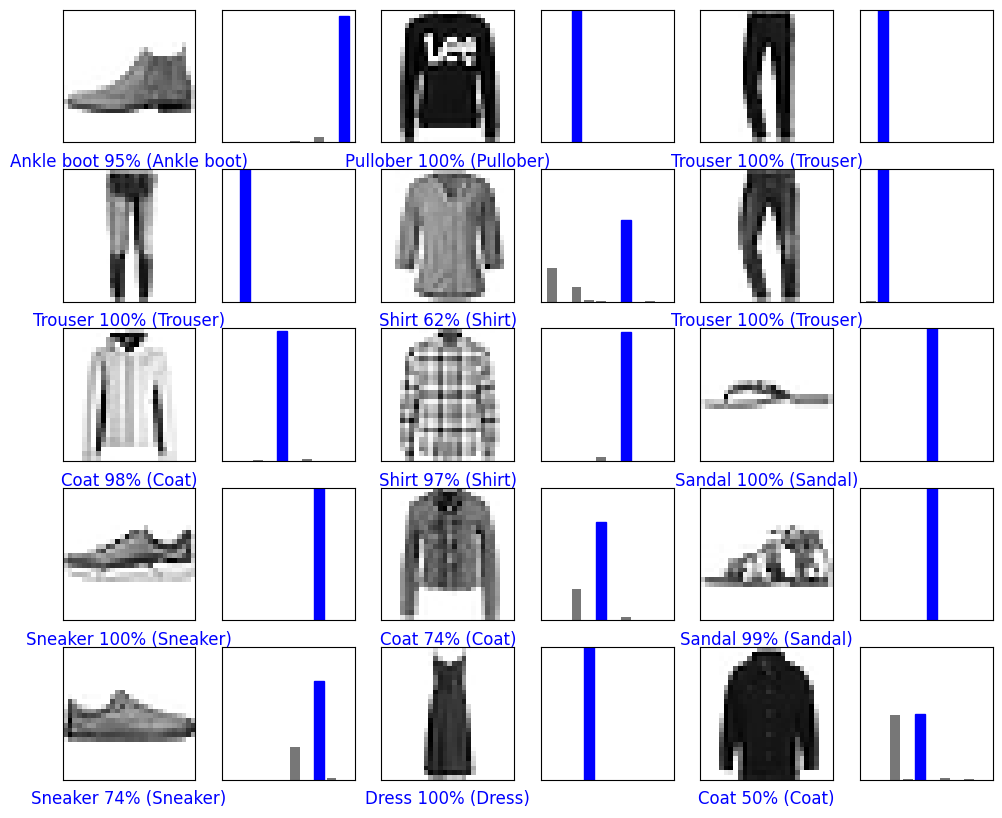

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
    
plt.show()

##### - 테스트 세트에서 이미지 하나 선택

In [44]:
img = test_images[0]
print(img.shape)

(28, 28)


In [45]:
img = (np.expand_dims(img, 0)) # dims(): 차원증가, 0 행증가
print(img.shape)

(1, 28, 28)


##### - 이 이미지의 예측 생성

In [46]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.0624852e-06 1.9368012e-07 1.2458833e-06 1.6427538e-06 4.1143053e-07
  7.6999366e-03 1.6568363e-05 3.8228359e-02 1.3973266e-05 9.5403659e-01]]


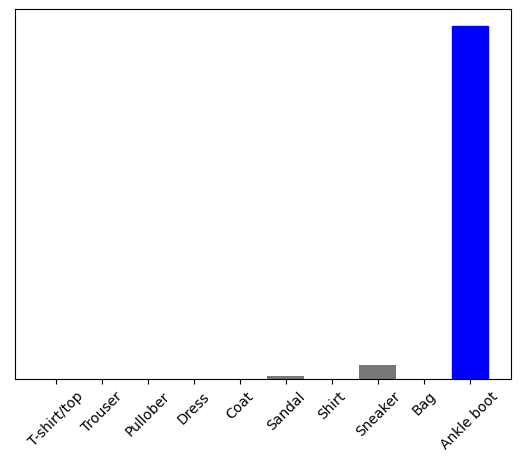

In [47]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

##### -  model.predict는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측 선택

In [48]:
np.argmax(predictions_single[0])

9

<h2 style="background:rgba(121, 121, 211, 0.3); padding:10px;">영화 리뷰를 사용한 텍스트 분류</h2>

- 총 50,000 건의 영화 리뷰 텍스트를 담은 IMDB 데이터셋이다.
- 훈련용 25,000개, 테스트용 25,000개로 구성되어 있으며 긍정 리뷰는 1, 부정 리뷰는 0으로 나타낸다.

###  1. 데이터 불러오고 구조 파악하기

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# num_words=10000 단어를 상위 만개정도 추출하여 가져옴

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [4]:
train_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
test_data.shape

(25000,)

In [8]:
train_data[:2]

# 문자는 바로 학습에 사용할 수 없기때문에 학습이 가능한 숫자로 변경시켜준 형태

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [11]:
train_labels[:10]

# 긍정/부정 리뷰를 0과 1로 표현
# 부정=0, 긍정=1

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [13]:
# 리뷰 길이 확인
print(len(train_data[0]))
print(len(train_data[1]))
print(len(train_data[2]))

# 학습에 사용하기 위해서는 모든 데이터의 길이가 같아야 한다.
# 데이터의 길이가 다를때는 데이터를 가장 긴 데이터 길이에 맞춰주는 것이 바람직하다.

218
189
141


In [15]:
word_index = imdb.get_word_index()
print(word_index.items())

dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008), ("hold's", 52009), ('comically', 11307), ('localized', 40830), ('disobeying', 30568), ("'royale", 52010), ("harpo's", 40831), ('canet', 52011), ('aileen', 19313), ('acurately', 52012), ("diplomat's", 52013), ('rickman', 25242), ('arranged', 6746), ('rumbustious', 52014), ('familiarness', 52015), ("spider'", 52016), ('hahahah', 68804), ("wood'", 52017), ('transvestism', 40833), ("hangin'", 34702), ('bringing', 2338), ('seamier', 40834), ('wooded', 34703), ('bravora', 52018), ('grueling', 16817), ('wooden', 1636), ('wednesday', 16818), ("'prix", 52019), ('altagracia', 34704), ('circuitry', 52020), ('crotch', 11585), ('busybody', 57766), ("tart'n'tangy", 52021), ('burgade', 14129), ('thrace', 52023), ("tom's", 11038), ('snuggles', 52025), ('francesco', 29114), ('complainers', 52027), ('templari

###  2. 데이터 전처리

In [16]:
word_index = {k:(v+3) for k, v in word_index.items()}
word_index

# v+3을 한 이유는 비어있는 인덱스 공간을 이용하기 위함. 0, 1, 2, 3 인덱스가 비어있게됨

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [17]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2    # unknown 알수없는 단어
word_index["<UNUSED>"] = 3

In [18]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

# 키와 밸류의 위치를 서로 바꿔줌

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [21]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# text안의 숫자를 가지고와서 단어로 변환시켜주는 함수
# ?는 숫자에 해당하는 단어가 없을때 처리하기 위함

In [22]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

---
<h3 style="color:#888;">✨ <span style="color:#ff6600;">pad_sequences</span> (sequences, maxlen=None, dtype="int32", padding="pre", truncating="pre", value=0.0)</h3>

<br>

- 문장의 길이를 maxlen 인자로 맞추어 준다. 120으로 지정했다면 120보다 짧은 문장은 0으로 채워서 120 단어로 맞춰주고 120보다 긴 문장은 120 단어까지만 잘라낸다.
- (num_samples, num_timesteps)으로 2차원 numpy 배열로 만들어준다. maxlen을 120으로 지정하였다면, num_timesteps도 120이 된다.
- 인수:
    - padding: "pre" or "post" (pre-앞, post-뒤)
    - truncating: "pre" or "post"
    - value: 채워질 값 (default=0)
    
---

In [26]:
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,
    value=word_index['<PAD>'],
    padding="post",
    maxlen=256
)

# 데이터의 길이를 맞춰주기 위해 비어있는 자리에 0을 채워줌 (가장 큰 리뷰의 길이가 256으로 가정)

In [27]:
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data,
    value=word_index['<PAD>'],
    padding="post",
    maxlen=256
)

In [28]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

###  3. 모델 설계

##### - GlobalAveragePooling1D()

sequence 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이(여기에선 16)의 출력 벡터 반환

In [29]:
vocab_size = 10000

model = keras.Sequential()   # 모델 객체 형성
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))   # 10000개의 단어벡터를 16개로 줄이겠다는 의미
model.add(keras.layers.GlobalAveragePooling1D())   # 평균값을 가지고 데이터 처리
model.add(keras.layers.Dense(16, activation="relu"))   # 은닉층
model.add(keras.layers.Dense(1, activation="sigmoid"))   # 출력층 (긍정,부정값으로 분류하는 이진분류이기때문에 sigmoid 사용)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [31]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [32]:
history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

# 15,000 / 512로 30개씩 수행
# validation_data => 학습데이터와 검증데이터 결과값을 모두 보여줌
# val_loss: 검증 데이터에 대한 손실값

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
27/30 [==========================>...] - ETA: 0s - loss: 0.6922 - accuracy: 0.5822WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D11101B798> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

### 4. 모델 평가

In [34]:
results = model.evaluate(test_data, test_labels, verbose=2)

print("loss =", results[0])
print("accuracy =", results[1])

# ∴ 긍정/부정 분류 모델을 평가했을때 87% 정확도로 분류해냄

782/782 - 1s - loss: 0.3225 - accuracy: 0.8739 - 769ms/epoch - 984us/step
loss = 0.32253891229629517
accuracy = 0.8738800287246704


### 5. 그래프로 확인

In [35]:
history_dict = history.history
history_dict.keys()

# 앞 2개: 학습데이터 / 나머지: 검증데이터

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

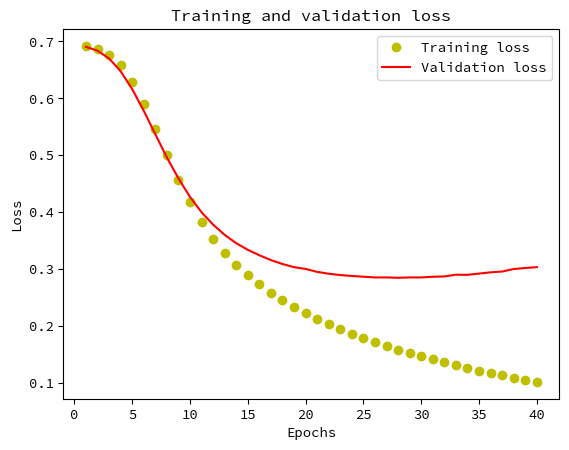

In [49]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.rcParams['font.family'] = 'Source Code Pro'
plt.plot(epochs, loss, 'yo', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# 그래프 결과를 확인해보면, 훈련데이터가 과대적합이 발생했다고 볼 수 있다.
# 경사하강법은 훈련데이터에 한해 정확도가 높아지는 것을 볼 수 있으나, 다른 데이터를 넣었을떄는 정확도가 떨어질 수 있다.

##### - 정확도 차트 확인

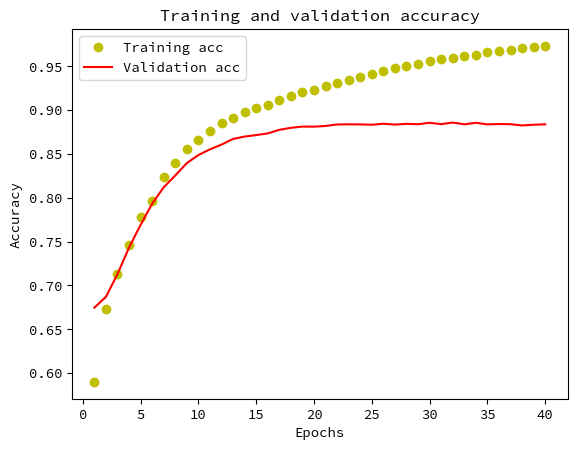

In [50]:
plt.clf() # 이미 그려진 차트 제거

plt.plot(epochs, acc, 'yo', label="Training acc")
plt.plot(epochs, val_acc, 'r', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()